In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

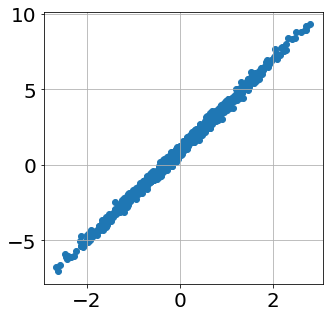

In [7]:
# sequential -> functional -> model sub classing(난이도, 자율성 up)

x_train = tf.random.normal(shape = (1000, ), dtype = tf.float32)
y_train = 3 * x_train + 1 + 0.2*tf.random.normal(shape = (1000, ), dtype =tf.float32)

x_test = tf.random.normal(shape = (300, ), dtype= tf.float32)
y_test = 3 * x_test + 1 + 0.2*tf.random.normal(shape = (300, ), dtype =tf.float32)

fig, ax = plt.subplots(figsize = (5, 5))
ax.scatter(x_train.numpy(),
           y_train.numpy())
ax.tick_params(labelsize = 20)
ax.grid()

# 뉴런 1개가 필요, activation 필요 없음

In [10]:
## sequential

# 모델 선언
model = tf.keras.models.Sequential([
          tf.keras.layers.Dense(units = 1, activation = 'linear')
])

# loss와 optimizer 설정(compile)
model.compile(loss = 'mean_squared_error',
              optimizer = 'SGD')

# 학습
model.fit(x_train, y_train, epochs = 50, verbose = 2)

# evaluate
model.evaluate(x_test, y_test, verbose = 2)

Epoch 1/50
32/32 - 0s - loss: 4.0949
Epoch 2/50
32/32 - 0s - loss: 1.2342
Epoch 3/50
32/32 - 0s - loss: 0.3880
Epoch 4/50
32/32 - 0s - loss: 0.1410
Epoch 5/50
32/32 - 0s - loss: 0.0688
Epoch 6/50
32/32 - 0s - loss: 0.0478
Epoch 7/50
32/32 - 0s - loss: 0.0417
Epoch 8/50
32/32 - 0s - loss: 0.0399
Epoch 9/50
32/32 - 0s - loss: 0.0393
Epoch 10/50
32/32 - 0s - loss: 0.0392
Epoch 11/50
32/32 - 0s - loss: 0.0391
Epoch 12/50
32/32 - 0s - loss: 0.0391
Epoch 13/50
32/32 - 0s - loss: 0.0391
Epoch 14/50
32/32 - 0s - loss: 0.0391
Epoch 15/50
32/32 - 0s - loss: 0.0391
Epoch 16/50
32/32 - 0s - loss: 0.0391
Epoch 17/50
32/32 - 0s - loss: 0.0391
Epoch 18/50
32/32 - 0s - loss: 0.0391
Epoch 19/50
32/32 - 0s - loss: 0.0391
Epoch 20/50
32/32 - 0s - loss: 0.0391
Epoch 21/50
32/32 - 0s - loss: 0.0391
Epoch 22/50
32/32 - 0s - loss: 0.0391
Epoch 23/50
32/32 - 0s - loss: 0.0391
Epoch 24/50
32/32 - 0s - loss: 0.0391
Epoch 25/50
32/32 - 0s - loss: 0.0391
Epoch 26/50
32/32 - 0s - loss: 0.0391
Epoch 27/50
32/32 - 0

0.04186995327472687

In [13]:
## model sub classing
from termcolor import colored

# tf.keras.Model에서 상속
class LinearPredictor(tf.keras.Model):
  def __init__(self):
    super(LinearPredictor, self).__init__() # tf.keras.Model의 initializer 상속

    self.d1 = tf.keras.layers.Dense(units=1, activation='linear')
  
  # 실행
  def call(self, x):
    x = self.d1(x)
    return x

EPOCHS = 10
LR = 0.01

### instantiation learning objects
model = LinearPredictor()

loss_object = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.SGD(learning_rate=LR)

### learning
for epoch in range(EPOCHS):
  for x, y in zip(x_train, y_train):
    # x는 2차원이상 으로 넣어줘야함
    x = tf.reshape(x, (1,1))
    # FowardPropogation
    with tf.GradientTape() as tape:
      predictions = model(x)
      loss = loss_object(y, predictions)
    
    # BackPropogation
    gradients = tape.gradient(loss, model.trainable_variables) # trainable_variables : weight & bias

    # parameter update
    optimizer.apply_gradients(zip(gradients, model.trainable_variables)) # 상응하는 gradients들을 구함

  print(colored('Epoch: ', 'red', 'on_white'), epoch+1)

  template = 'Train Loss: {:.4f}\n'
  print(template.format(loss))

Epoch:  1
Train Loss: 0.0046

Epoch:  2
Train Loss: 0.0046

Epoch:  3
Train Loss: 0.0046

Epoch:  4
Train Loss: 0.0046

Epoch:  5
Train Loss: 0.0046

Epoch:  6
Train Loss: 0.0046

Epoch:  7
Train Loss: 0.0046

Epoch:  8
Train Loss: 0.0046

Epoch:  9
Train Loss: 0.0046

Epoch:  10
Train Loss: 0.0046



In [5]:
plt.style.use('seaborn')
from termcolor import colored

n_sample = 300
x_train = np.random.normal(0, 1, size = (n_sample, 1)).astype(np.float32)
y_train = (x_train >= 0).astype(np.float32)
#print(y_train)

#fig, ax = plt.subplots(figsize = (7,7))
#ax.scatter(x_train, y_train)
#ax.tick_params(labelsize = 20)

class classifier(tf.keras.Model):
  def __init__(self):
    super(classifier, self).__init__()

    self.d1 = tf.keras.layers.Dense(units=1 ,activation= 'sigmoid')

  def call(self, x):
    predictions = self.d1(x)
    return predictions

EPOCHS = 10
LR = 0.01
model = classifier()
loss_object = tf.keras.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.SGD(learning_rate = LR)

loss_metric = tf.keras.metrics.Mean()
acc_metric = tf.keras.metrics.CategoricalAccuracy()

for epoch in range(EPOCHS):
  for x, y in zip(x_train, y_train):
    x = tf.reshape(x, (1,1))
    y = tf.reshape(y, (1,1))

    with tf.GradientTape() as tape:
      predictions = model(x)
      loss = loss_object(y, predictions)

    gradient = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradient, model.trainable_variables))

    loss_metric(loss) # loss를 차곡차곡 누적
    acc_metric(y, predictions) # accuracy를 차곡차곡 누적

  print(colored('Epoch: ', 'cyan', 'on_white'), epoch+1)
  template = 'Train Loss : {:.4f}\t Train Accuracy: {:.2f}%'

  ds_loss = loss_metric.result() # 전체 데이터셋 loss의 mean
  ds_accuracy = acc_metric.result()

  print(template.format(ds_loss, ds_accuracy*100))
loss_metric.reset_states()
acc_metric.reset_states()


Epoch:  1
Train Loss : 0.3948	 Train Accuracy: 100.00%
Epoch:  2
Train Loss : 0.3522	 Train Accuracy: 100.00%
Epoch:  3
Train Loss : 0.3231	 Train Accuracy: 100.00%
Epoch:  4
Train Loss : 0.3014	 Train Accuracy: 100.00%
Epoch:  5
Train Loss : 0.2843	 Train Accuracy: 100.00%
Epoch:  6
Train Loss : 0.2703	 Train Accuracy: 100.00%
Epoch:  7
Train Loss : 0.2586	 Train Accuracy: 100.00%
Epoch:  8
Train Loss : 0.2486	 Train Accuracy: 100.00%
Epoch:  9
Train Loss : 0.2399	 Train Accuracy: 100.00%
Epoch:  10
Train Loss : 0.2323	 Train Accuracy: 100.00%


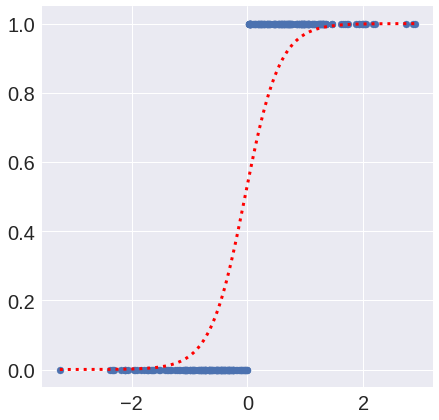

In [13]:
x_min, x_max = x_train.min(), x_train.max()

x_test = np.linspace(x_min, x_max, 300).astype(np.float32).reshape(-1, 1)

x_test_tf = tf.constant(x_test)
y_test_tf = model(x_test_tf)

x_result = x_test_tf.numpy()
y_result = y_test_tf.numpy()

fig, ax = plt.subplots(figsize = (7,7))
ax.scatter(x_train, y_train)
ax.tick_params(labelsize = 20)
ax.plot(x_result, y_result,'r:', linewidth = 3)